In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as tck
%matplotlib inline

In [2]:
!sh download.sh

history.txt                                   100% 6575KB 257.9KB/s   00:25    
history_space.txt                             100%  289KB 602.7KB/s   00:00    


# Cores

In [3]:
df = pd.read_csv("history.txt", names = ["date", "time", "user", "queued", "running"], sep = " ")
df["date"] = df["date"] + " " + df["time"]
df["date"] = pd.to_datetime(df["date"], dayfirst = True)
df = df[["date", "user", "queued", "running"]].drop_duplicates(["date", "user"])

In [4]:
unique_users = np.unique(df["user"].values)
unique_dates = np.unique(df["date"].values)

In [5]:
index = pd.MultiIndex.from_product([unique_dates, unique_users], names = ["date", "user"])
df = pd.merge(pd.DataFrame(index = index).reset_index(), df, how = "left").fillna(0).sort_values(by = ["date", "user"])

/usr/lib64/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


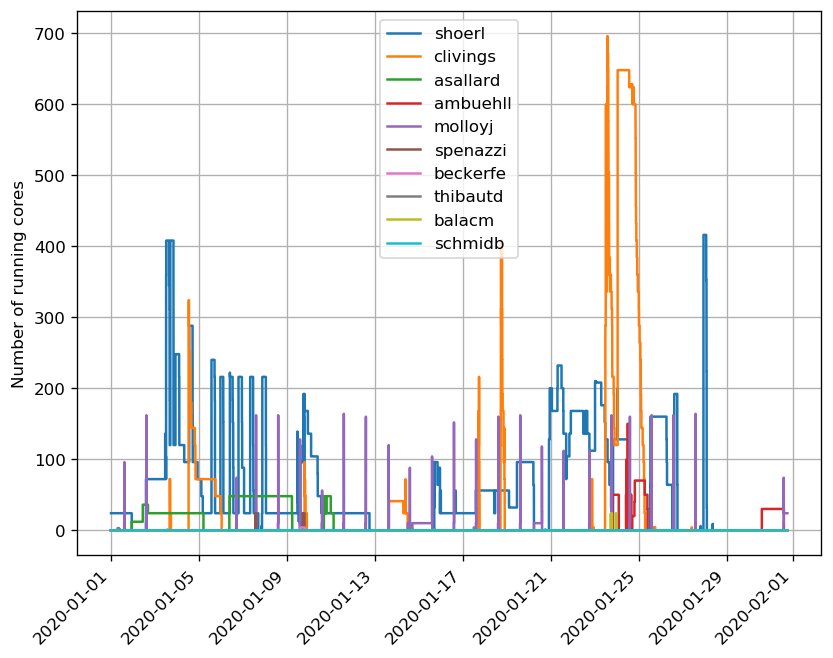

In [6]:
df_plot = df[df["date"] >= pd.to_datetime("1 January 2020")]
unique_users = np.unique(df_plot.loc[df_plot["running"] > 0, "user"])

unique_users = df_plot.groupby("user").sum().reset_index().sort_values(by = "running", ascending = False)
unique_users = unique_users[unique_users["running"] > 0]["user"].values

plt.figure(dpi = 120, figsize = (8, 6))

for user in unique_users:
    df_user = df_plot[df_plot["user"] == user].sort_values(by = "date")
    plt.step(df_user["date"], df_user["running"], label = user)

plt.xticks(rotation = 45, ha = "right")
plt.grid()
plt.ylabel("Number of running cores")
plt.legend(loc = "best")

# Space

In [7]:
df = pd.read_csv("history_space.txt", names = ["date", "time", "user", "space"], sep = " ")
df["date"] = pd.to_datetime(df["date"], dayfirst = True)
df = df[["date", "user", "space"]].drop_duplicates(["date", "user"])

In [8]:
unique_users = np.unique(df["user"].values)
unique_dates = np.unique(df["date"].values)

In [9]:
index = pd.MultiIndex.from_product([unique_dates, unique_users], names = ["date", "user"])
df = pd.merge(pd.DataFrame(index = index).reset_index(), df, how = "left").fillna(0).sort_values(by = ["date", "user"])

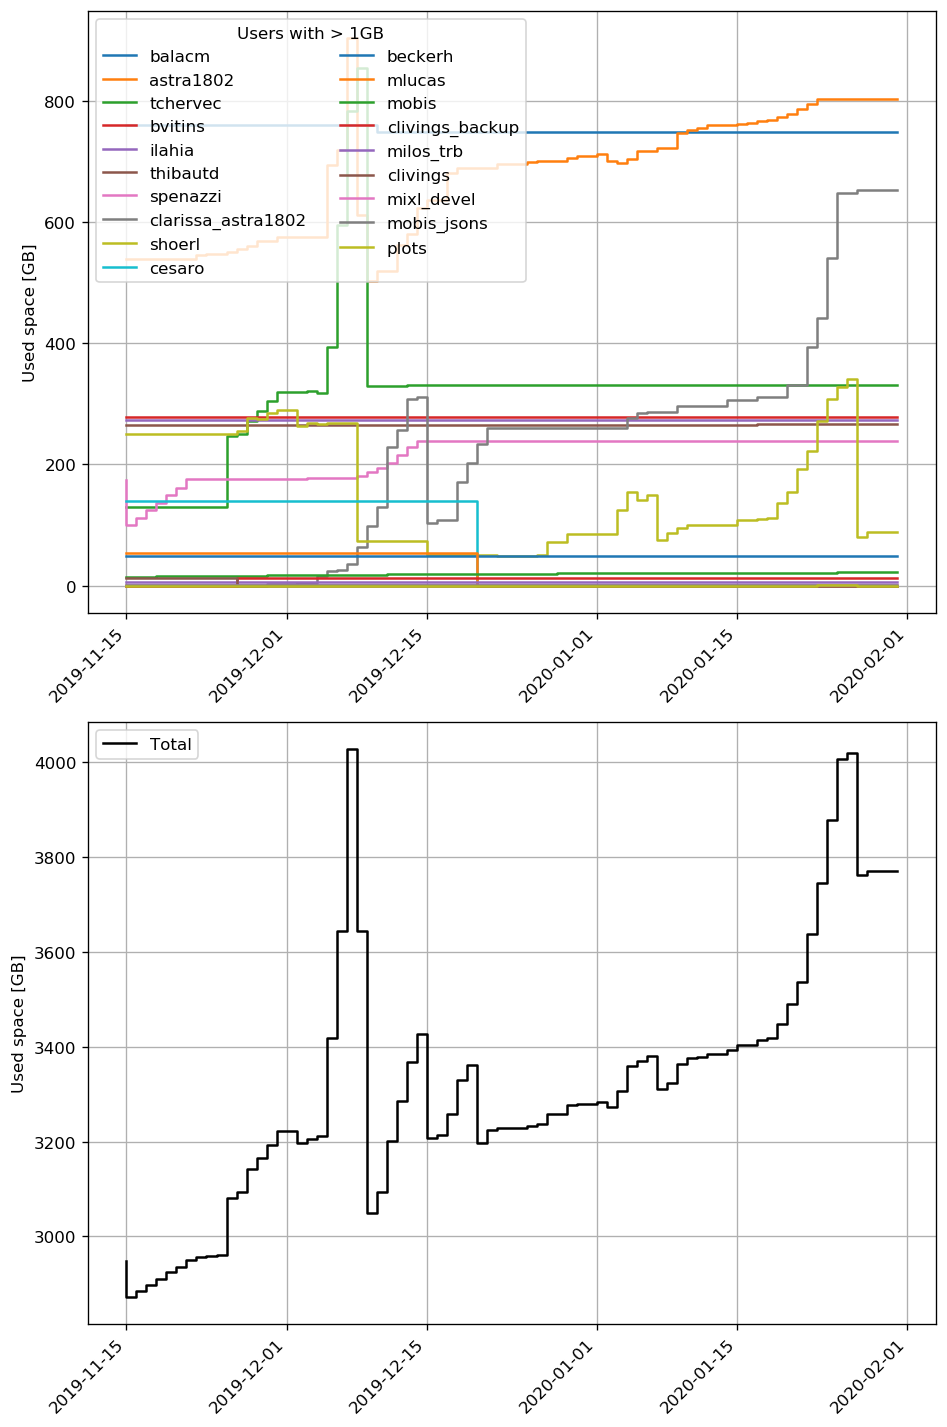

In [10]:
df_plot = df[df["date"] >= pd.to_datetime("15 November 2019")]

unique_users = df_plot.groupby("user").sum().reset_index().sort_values(by = "space", ascending = False)
unique_users = unique_users[unique_users["space"] > 1024 * 1024]["user"].values

plt.figure(dpi = 120, figsize = (8, 12))
plt.subplot(2, 1, 1)

for user in unique_users:
    df_user = df_plot[df_plot["user"] == user].sort_values(by = "date")
    plt.step(df_user["date"], df_user["space"] / 1024 / 1024, label = user)

plt.xticks(rotation = 45, ha = "right")
plt.grid()
plt.ylabel("Used space [GB]")
plt.legend(loc = "upper left", title = "Users with > 1GB", ncol = 2)

df_aggregate = df_plot[["date", "space"]].groupby("date").sum().reset_index()

plt.subplot(2, 1, 2)
plt.step(df_aggregate["date"], df_aggregate["space"] / 1024 / 1024, "k", label = "Total")

plt.xticks(rotation = 45, ha = "right")
plt.grid()
plt.ylabel("Used space [GB]")
plt.legend(loc = "upper left", ncol = 2)

plt.tight_layout()